In [1]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

## Golden Codys

- 1 / 4 chance to win
- 1000 tickets

([<matplotlib.axis.XTick at 0x128636d30>,
 <a list of 2 Text xticklabel objects>)

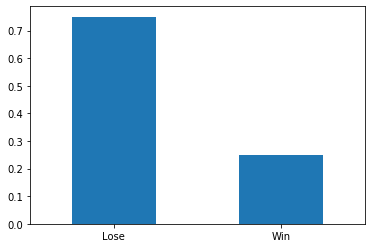

In [10]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ['Lose', 'Win'], rotation=0)

We give everyone in a class a ticket

In [33]:
n = 40
tickets.sample(n).mean()

0.3

Sampling Errors

- non-response
- undercoverage
- voluntary
- leading questions
- social desireability

In [34]:
winrates = []

for i in range(10_000):
    winrate = tickets.sample(n).mean()
    winrates.append(winrate)

Central Limit Theorem: The **sampling distribution** is normally distributed even when the underlying random variable is not.

- the average of the sampling distribution ~ the population average
- the variance of the sampling distribution is the variance of the population divided by the sample size
- the standard deviation of the sampling distribution is ~ population standard deviation / $\sqrt{n}$

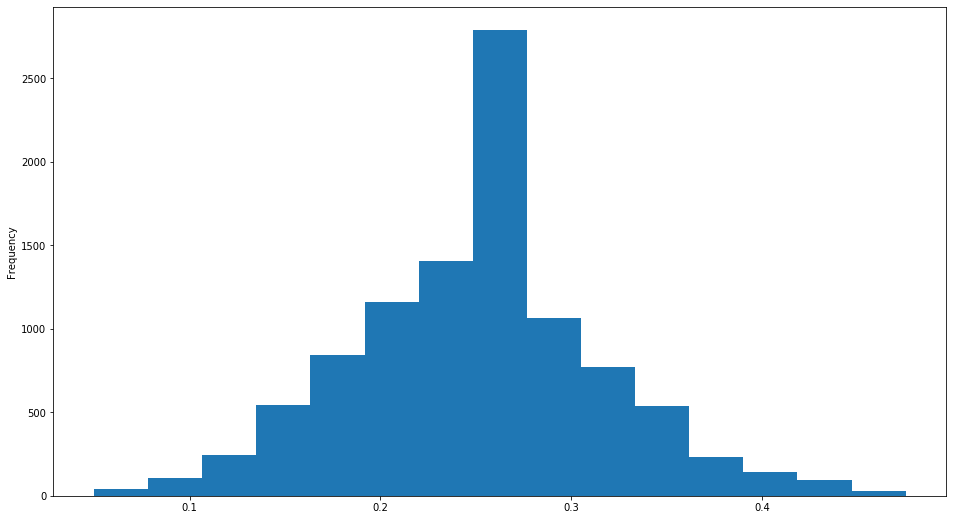

In [35]:
pd.Series(winrates).plot.hist(bins=15, figsize=(16, 9))

## Mini Exercise

1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
1. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
1. Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

One of the webdev cohorts finds they have a winrate of 20%. They claim that they were cheated! and the tickets were distributed unfairly.

In [37]:
winrates = pd.Series(winrates)

What's the likelihood we see a 20% or less winrate (w/ 40 students) given that the true winrate is 25%?

In [38]:
(winrates <= .2).mean()

0.2934

In [28]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2)

0.27842712218944454

What's the likelihood we see a 20% winrate (w/ 25 students) or something more extreme? given that the true winrate is 25%

In [29]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2) + stats.norm(winrates.mean(), winrates.std()).sf(.2999999999999)

0.5667233448388531

A data science class calculates their win rate at 40%. The web dev students immediately accuse the person distributing the tickets of favoritism.

How likely is it that we see a 40% winrate (or something more extreme) purely due chance, given the actual winrate is 25%?

In [30]:
winrate_distribution = stats.norm(winrates.mean(), winrates.std())

winrate_distribution.sf(.4) + winrate_distribution.cdf(.1)

0.08567783970528366

In [32]:
winrate_distribution.cdf(.1) * 2

0.08302285425972485